In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
n = 100
delta = 10
g = 40
X = np.linspace(0,n,n*delta)
f = np.sin(np.linspace(0,1,g)*(2.*np.pi))
#f = 2.* (np.arange(g) % 2) - 1
f = f / np.linalg.norm(f)

In [3]:
def Ysim(mu=3.):
    Y = np.random.randn(n*delta)
    F = np.zeros(n*delta)
    i = np.random.randint(0,n*delta-g)
    Y[i:i+g] += f*mu
    F[i:i+g] += f*mu
    return(Y,F)

In [4]:
def Nsim():
    Y = np.random.randn(n*delta)
    return(Y)

In [5]:
Y,F = Ysim()

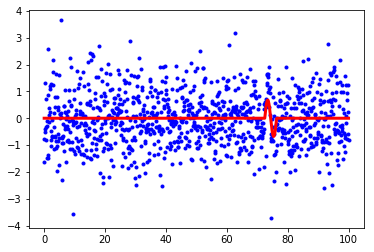

In [6]:
plt.plot(X,Y,'b.')
_ = plt.plot(X,F,'r',lw=3)
_ = plt.savefig('sineNoiseSig.png')

In [11]:
fhat = np.random.randn(g)
fhat = fhat / (np.sum(fhat**2.))**0.5

In [12]:
def conv(Y,fhat):
    g = len(fhat)
    return(np.array([np.sum(Y[i:i+g]*fhat) for i in range(len(Y) - g)]))

In [13]:
yc = conv(Y,fhat)
i = np.argmax(yc)
cm = np.max(yc) - (2.*np.log(n))**0.5

In [14]:
def maxi(x,fhat,gamma = 1):
    xc = conv(x,fhat)
    xe = np.exp(np.abs(xc)**gamma)
    sm = np.log(np.sum(xe))
    g = len(fhat)
    gm = [gamma * np.sum(np.sign(xc) * np.abs(xc)**(gamma - 1) * xe * x[j:-(g-j)]) / np.sum(xe) for j in range(g)]
    return(sm,np.array(gm))

In [15]:
def maxinf(x,fhat):
    xc = conv(x,fhat)
    sm = np.max(np.abs(xc))
    g = len(fhat)
    gm = [np.sum((np.abs(xc)==sm) * x[j:-(g-j)]) for j in range(g)]
    return(sm,np.array(gm))

In [16]:
sm, gm = maxinf(Y,fhat)

In [35]:
fhat = np.random.randn(g)
fhat = fhat / (np.sum(fhat**2.))**0.5

In [41]:
lamb = 0.1
fhat = np.random.randn(g)
fhat = fhat / (np.sum(fhat**2.))**0.5
for t in range(200):
    Y, _ = Ysim()
    sm, gm = maxi(Y,fhat,gamma=1.)
    fhat += 10.*(t+1)**(-0.5) * (gm - 2.*lamb * fhat)
    print(fhat)
    #fhat = fhat / np.linalg.norm(fhat)

[-3.52800823  2.10360205 -3.30396875  0.54447496  3.15094503 -0.41374387
  2.19128651  0.60169524  0.93829335  3.71782789  2.30426229  0.25591918
 -0.72115029  0.23893922  0.76240472  1.35159621 -1.94044323 -4.51846966
  2.46425614 -2.78825321  0.91981867  2.28655019 -3.60442197  2.2500596
 -1.29332411 -1.08924663 -0.17106527 -0.69654546  1.71668102 -0.27366941
  0.45899652 -0.64194768 -0.25138728 -2.62861054 -2.78077591 -0.03744952
 -0.31545798  2.36288677  0.83291167 -2.72547415]
[ -2.06095635   7.59585124   1.58227679 -10.52829009   8.02813214
   8.69684856 -10.565519    -9.74924388  -1.37604054   2.41409674
  21.58499206  11.91138161 -19.79353937  -2.83124529   6.38019305
   6.07646601  -6.92958376  -3.87663216  10.20218106  -0.7726932
  -0.65455711   4.36794372  -8.97628693   0.08221708  -9.05169688
  -6.01224236   2.70522995  -5.72596882  20.53315813   5.45317379
 -12.00017772  -2.83702509   4.57529753  -1.40998443   0.6051944
  -9.59409246   0.13232346   3.81373678   0.30794276 

[ -4.88233318   1.99591031  -2.80030218   1.03121326   0.35620858
  -2.70476085  -4.53962208   0.23537365 -11.01274155  -0.60652454
  -0.16113885   1.82072197   0.3165625   -3.29082845   0.38223718
  -6.93883493   2.83798635   9.79340586  -0.73385079   2.85522729
  -3.47159825   8.92360391   0.60049152   2.37695973   6.62339072
  -2.71270686  -2.17815726   3.57140595   0.78530879   5.25710732
  -1.9550599   -4.38980875  -3.03544423   1.75461032   0.48617787
  -3.72156695   7.77131336  -1.1551432   -5.99761802  -5.4213405 ]
[ -7.02126083   0.46229555  -2.11263866   3.07262088   1.04343094
  -6.51469401   0.52348388   1.97039249 -10.84293542  -0.06862223
  -0.55253252   1.99150411   5.40842377  -7.57338125   1.96545953
  -1.09473344   1.29394158   8.64445878  -1.1942845    3.49861203
  -2.91397948   2.48064429   0.70651496   1.10800113   5.81939548
  -8.14879254  -1.10081145   5.71807562  -3.93733065   5.89512986
  -4.56202242  -0.89854959  -0.84166143   2.27492479  -3.22105745
  -5.2376

[ 1.83254944 -2.29331705  2.82386558 -1.19804885  1.1683531  -4.46771324
 -2.65455041 -1.51872643 -3.81422714 -1.04054359 -3.83853797 -3.80970545
 -1.43067265  9.64304062 -0.28911469  1.71884573  1.92910166 -4.2135304
  2.00967763  2.45376966 -1.93103119  3.58162951 -3.39246138  3.83986114
 -2.16790368 -6.1058114  -4.34425249 -5.51807819  3.03208482 -1.56909777
  4.01047142 -3.58751176 -5.67960537  5.6185428  -3.07737782  8.62495276
  4.6185794  -3.54928336 -1.15925181  3.5391753 ]
[ 1.23794608  1.50698945  4.25126503  0.83938281  0.53019053 -5.45765106
 -1.41063007 -2.49204594 -2.67347139 -1.79566628 -2.09501405  1.46138148
 -2.34871146  7.24021538 -1.08150108  5.4803204   1.99446901 -5.96356003
  2.48603705  4.31888215 -1.31464007  3.54930283 -2.06576926  4.38527323
 -5.16866578 -8.26827666 -3.70370204 -6.69683196  4.04043998 -2.2434493
  2.89789079 -1.63786846 -1.37895415  6.38605608 -3.37567308  8.37212901
  3.42418022 -1.52590254  0.37801248  0.95883519]
[ 0.50712686  0.37832919  

[ 6.02978341 -1.14574179 -2.03478971  0.64489254  4.29626973  0.72229052
  1.17305695 -0.59380445 -0.27602905  2.46557746  0.13052482  2.41810486
 -2.22356882  5.55355413  1.0605708   0.84928551 -2.05995478  0.98322046
 -1.679462    0.58585085  5.89954944  7.86817903  1.52350142  4.65283613
  4.48394066  0.71221563 -3.14307594 -9.22391543  2.30914777 -1.30547114
  2.32950596 -2.4070333  -2.25305281  0.320713   -0.31506861  2.55664618
  5.38269466 -7.57507735 -7.88599615  1.19331244]
[  5.00195264e+00  -1.55858533e+00  -1.05478886e+00   1.79253429e+00
   4.53602578e+00   9.84317551e-01   3.49286125e+00  -1.53934052e+00
   1.85946241e+00   1.96294763e+00  -4.26689778e-02   1.04597114e+00
  -1.73524278e+00   4.71122300e+00  -3.71539896e-01   8.51946259e-01
   9.90669256e-03   5.69542529e-01  -2.98036279e+00   3.78926013e-02
   4.41205970e+00   8.01159250e+00   3.20485249e+00   4.90222821e+00
   6.44518014e+00   3.05779632e+00  -3.71984721e+00  -9.91090268e+00
   2.06593114e+00   2.8690578

[ 0.96813352 -5.19720238 -1.99849276 -2.77250388  0.93727127  2.15950132
  1.31566671  3.4150111   2.95671305 -0.92019709  2.08338342  3.65484347
  3.62025895  5.18421165  2.46955904  1.3136768  -1.9478733   2.84232552
  2.11987897  6.36995795  7.89885647  7.22673107  2.55788746 -4.37772722
  4.10521282  3.53047538 -2.70041366 -2.26446651 -2.33138293 -3.58544512
 -1.57568514  2.934542   -4.74120023  3.51364912 -0.44917931  0.48989726
  0.81128827  2.25463517 -8.85369386 -2.20203606]
[  1.57909628  -2.91807857  -1.54112617  -2.71065742   0.812159
   2.18758795   2.67820705   3.44856377   0.27230429   1.05868196
   2.17099682   3.05971548   0.87920758   5.49240152   1.48835689
   0.90516239  -1.9915009    2.42497043   3.82152309   6.20528094
   7.40138828   7.0373326    2.08985047  -4.28583279   2.43219701
   4.08048411  -2.21889746  -1.57033677  -1.41625701  -3.74363835
  -1.34874964   3.22145045  -4.71419534   4.16719506   0.39109854
  -0.40881502   0.30961509   3.15944396 -10.03642246

[-1.19973004 -5.32605778  0.72929803 -0.80867934 -5.27580879  4.04168218
 -2.34324955  2.30923073  1.65837218  3.73559614  1.76632129  1.49435289
  5.25229716  0.44542899  1.87945682 -3.14295366 -3.87785372  9.54650398
  4.7113062  -0.37790618  5.47919507  4.07940664  1.8994078  -2.47595561
 -0.66676256 -0.6691157   1.6767884  -3.65298281 -1.77630481  4.62548235
 -1.81001637  3.45590224  1.53887555 -1.2202119   7.58729168 -4.09108445
 -0.84231551 -1.3658737  -3.64651437 -1.36137676]
[-0.87488746 -5.11858374  1.31850466 -1.48134416 -5.06491261  3.44411823
 -3.28085613  3.4497243   0.25489732  4.92236003  3.12608379  1.25283541
  4.48067481  1.66907706  2.74542529 -3.88599749 -1.91635443  8.38723423
  5.07641216  0.54263092  4.90941638  2.83410372  2.86635602 -3.21110246
 -0.11885626 -1.27583688  0.18866656 -3.97751507 -0.50719042  4.78149887
 -0.88390159  2.57006998 -0.33965472  1.05489607  7.24436318 -3.8661176
 -1.73049393 -0.50958737 -3.64398292 -1.84609492]
[-1.23225277 -2.83308437 

[-4.08774372 -5.11398336 -0.56178778 -2.95494624  2.07176423  5.34144551
 -2.36628214  0.89067927 -1.83274601  1.12181331  5.52014285 -2.20831772
  1.97459612  4.25892762  4.1101337  -3.3907649  -0.7027745   8.41142022
  1.69900404  2.7904722   7.67652022  0.6691342   0.67137968 -1.16473781
 -3.60862251 -2.78822481 -0.37533159 -5.02619848 -6.14520962  1.60346511
 -2.46376671 -2.01184707 -0.40631839 -1.17038271  4.74854488 -3.56781309
  2.69350882 -0.54259122 -1.05197742  0.51758949]
[-3.62355604 -5.89349753 -0.84588614 -2.42516141  0.58813507  4.76186528
 -1.20552063  1.02883977 -1.82447903  1.5928171   4.86622338 -0.87800821
  1.9312243   3.21692755  3.33136427 -3.07854662  0.21041973  8.44028475
  0.62727482  3.49668076  8.06664227 -0.159969    2.05406609 -1.45055958
 -3.08340109 -2.66526839  0.45416278 -5.57601305 -5.90205569  2.56063016
 -2.46666244 -1.19344272 -0.52880387 -1.39042294  5.95054573 -3.40454917
  2.09716455 -1.51899781 -1.08554065  0.64808253]
[-3.31104079 -7.27640391

[ 0.12115437 -6.50981683  1.01309745 -4.16175472  0.39092301 -3.85584075
  0.595955    3.17913672  0.0728791  -0.30195264 -2.91708602  0.62427881
  2.28357303  2.50472461  2.00105238  0.21209774  2.15529238  4.34736287
  0.70071275  3.89313593  6.17854944  1.33848406  2.01629729  3.72283088
  1.01078173 -2.47821603  0.21982661 -6.33361669 -0.32787986  7.06092714
 -1.14395615  0.07205274  1.28992295 -6.41652709  6.51895277 -2.97534202
  4.2103888   2.52376924  0.13341799 -2.73598664]
[ -8.46466226e-01  -5.67587252e+00   1.00373371e+00  -4.16172656e+00
   3.85027703e-02  -3.21433257e+00   6.61222702e-01   4.21848767e+00
  -7.18534466e-01   6.78768340e-01  -2.46600037e+00   1.10675634e+00
   2.62796049e+00   1.67965065e+00   2.18855590e+00  -2.04022125e-01
   1.68787053e+00   5.35778865e+00   1.68350185e+00   3.27190247e+00
   4.74223046e+00   1.80904431e-01   2.30555733e+00   3.64286942e+00
   1.55063505e+00  -2.32326902e+00   8.51301368e-01  -5.99391068e+00
  -1.49932700e+00   8.0970085

[ 1.82091686 -2.78697992  0.9103154  -3.55416884  4.54914245  2.52057385
  0.43977578  5.62298251  0.11344174 -2.57701087 -4.78033928 -0.66263702
  3.85035797  3.72222877  2.12875745  2.53125733  3.59212616  1.55363848
  8.68361711  0.72168585  8.08124812 -4.59029918  2.87259867  0.30565422
  4.23765355 -0.21350498  0.50203656 -3.39514757 -2.81597285  2.11279476
 -0.16986662 -3.86002053 -1.5596287  -2.32043047 -1.04768387 -1.72268151
 -3.66633401 -2.52766624  0.02513383 -2.931478  ]
[ 0.76483931 -3.26503671  0.69930885 -2.04518502  4.76252409  1.92605912
  0.72876454  6.13909304 -0.79344095 -2.8641415  -6.02280463 -1.21775653
  2.68103376  3.2410363   0.13403396  2.5228411   4.44617559  2.68294846
  8.69309185  0.41512549  8.04217272 -4.37442293  2.23074793 -0.03184364
  4.07224544  0.12403352  1.42781358 -2.71705991 -2.59348178  1.89716242
 -0.11824795 -3.82147543  0.07165751 -1.4339864  -2.07956459 -0.29114752
 -2.91959239 -2.86475383 -0.69395433 -3.64324977]
[ 1.0127262  -4.55602573

[ 0.59648527 -1.55657005 -1.07396537 -1.60231287  2.8431628   0.49618706
 -3.37147699  2.38587557  3.29857112 -5.11015385 -3.02910374  2.44118995
  0.90988913  3.96438088  2.63540671  3.14783061  8.45246215  4.40464761
  7.98165654  2.51144921  5.34588805 -0.01934365 -0.20566196  1.1977741
  0.51657103  3.27572716 -2.52111294 -2.15469812 -3.25844831  2.92367451
  0.24715862 -0.88127282 -0.61293248 -2.15956232 -2.90375644 -5.58091995
 -2.17686869  0.39817053  2.60374876 -4.28670773]
[-0.25120464 -0.77877395 -0.9468677  -1.56883118  2.54355098 -0.70451015
 -2.54006453  2.7341995   2.93128437 -4.53510795 -3.84608918  1.86314529
  2.1668797   5.17800029  2.65705907  2.74033712  7.45613913  3.05287817
  8.14282081  1.42446889  4.89711472 -0.78189584 -1.2938119   2.15759414
  1.03562519  3.23410879 -3.32952204 -1.52302098 -3.53260488  4.5637965
  0.34065049 -1.57781    -1.41331979 -3.64168069 -2.98702718 -6.14329583
 -3.28595384 -0.95165258  3.2035564  -4.47271238]
[ -5.28478535e-01  -9.7762

In [37]:
fhat

array([-0.83345854, -0.5220268 , -1.07764048, -1.2077408 ,  0.68838657,
       -0.27849046,  0.13040527,  3.38663335, -1.29367061,  5.3700578 ,
        0.77732044,  4.27904787, -1.12986637,  2.48855696,  1.94219856,
        3.56638093, -3.88937676,  6.58680421, -0.42061498,  0.17759813,
       -1.02722162, -6.51104329, -0.66636519,  4.22112162, -5.79446657,
       -3.40107212, -4.24280625, -3.42122875, -3.76179018, -2.69919329,
       -2.50767505, -0.15872853, -0.34045563,  1.19291534, -3.725417  ,
       -0.52067909,  3.69330329, -3.74771728, -0.44330577, -2.77123707])

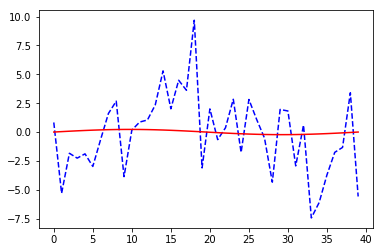

In [42]:
_ = plt.plot(fhat,'b--')
_ = plt.plot(f/np.linalg.norm(f),'r')
_ = plt.savefig('sineSig.png')

In [616]:
def sqrscan(Y):
    return(np.max(conv(Y**2 - 1, np.ones(g)/g**0.5)))

In [623]:
def learnscan(Y):
    return(np.max(np.abs(conv(Y,fhat))))

In [683]:
T = 1000
lnull = [learnscan(Nsim()) for i in range(T)]
snull = [sqrscan(Nsim()) for i in range(T)]
lalt = [learnscan(Ysim()[0]) for i in range(T)]
salt = [sqrscan(Ysim()[0]) for i in range(T)]

In [684]:
ltpr = [np.mean(lalt > st) for st in np.sort(lnull)]
stpr = [np.mean(salt > st) for st in np.sort(snull)]
fpr = 1. - np.linspace(0,1,T)

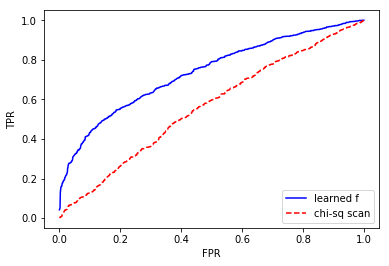

In [685]:
plt.plot(fpr,ltpr,'b-',label="learned f")
plt.plot(fpr,stpr,'r--',label="chi-sq scan")
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('sineROC.png')

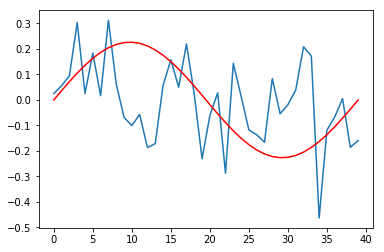

In [599]:
for t in range(100):
    Y, _ = Ysim()
    sm, gm = maxinf(Y,fhat)
    if sm < (2.*np.log(n*delta))**0.5:
        gm = np.random.randn(g)
        fhat += .2*gm
    else:
        fhat += gm
    fhat = fhat / np.linalg.norm(fhat)

_ = plt.plot(fhat)
_ = plt.plot(f/np.linalg.norm(f),'r')

In [578]:
conv(Y,fhat)

array([ -2.32128453e+00,  -1.08236081e+00,  -2.23401484e+00,
         1.25504406e+00,  -4.31335875e-01,  -1.01729434e+00,
        -1.14096080e+00,  -1.28668665e-01,  -2.28952037e+00,
        -5.79983874e-01,   1.63501127e-01,  -2.17823173e+00,
         7.61441494e-01,  -9.67914631e-01,  -3.63569441e-01,
        -6.67841359e-01,  -4.04267356e-01,   1.15654529e+00,
         1.90905344e-01,  -1.61179203e+00,  -1.93585043e+00,
         6.01738678e-01,   1.72517787e+00,  -1.08503178e+00,
        -9.80690897e-01,  -1.65020696e+00,   1.21452611e+00,
        -1.02538209e+00,   6.65042537e-01,   2.72779043e-01,
        -5.07429071e-01,   8.34916157e-03,   1.23369635e+00,
         8.16955540e-01,   4.84012236e-01,  -2.92808093e-01,
         1.09248790e+00,  -7.68204597e-03,   1.77229069e-01,
        -1.35063045e+00,   1.87002564e+00,   1.19957568e+00,
        -2.79467334e-01,  -1.19063435e+00,  -6.97203558e-01,
         2.82660127e+00,   8.00473798e-01,   1.09955728e+00,
        -2.34194553e-01,

(array([  10.,   44.,   83.,  153.,  205.,  195.,  169.,   70.,   19.,   12.]),
 array([-7.01883246, -6.44443083, -5.87002921, -5.29562758, -4.72122595,
        -4.14682433, -3.5724227 , -2.99802107, -2.42361944, -1.84921782,
        -1.27481619]),
 <a list of 10 Patch objects>)

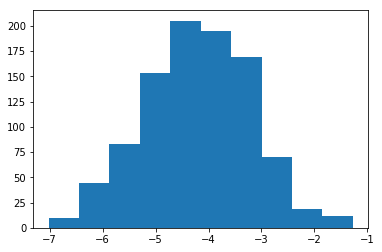

In [580]:
plt.hist(conv(Y,fhat)-(2.5*np.log(n*delta))**0.5)